# Importing Libraries 

In [1]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cvzone
import os
import time
import shutil
from PIL import Image

# Loading the model 

In [2]:
model = YOLO('best.pt')


0: 384x640 1 Face, 276.3ms
Speed: 3.1ms preprocess, 276.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


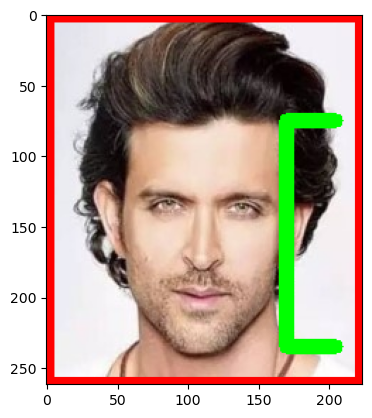

In [9]:
image_path = '4.jpg'
image = cv2.imread(image_path)
results = model(image)
for r in results:
    boxes = r.boxes
    labels = r.names
    name = str(list(labels.values()))
    #name_txt = str(name)
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        w, h = x2-x1, y2-y1
        cv2.rectangle(image, (x1,y1),(x2,y2), (0,0,255), 10)
        #cv2.putText(image, f'{name}', (150,50), cv2.FONT_HERSHEY_SIMPLEX ,1, (0,0,0), 2)
        # cvzone.putTextRect(image, name_txt,(max(0,x1), max(25,y1)))


face = image[y1:y2, x1:x2]
cv2.putText(face, f'{name}', (150,200), cv2.FONT_HERSHEY_SIMPLEX ,5, (0,255,0), 10)
#print(face)
plt.imshow(face[:,:,::-1])